# APS Failure Set

# Introduction

This project has the objective of applying the knowledge obtained in the "Data Preparation" class. In this assignment, the knowledge about Exploratory Data Analysis (EDA), Data Preparation/Evaluation methods, Descriptive Statistics and also the application of Principal Component Analysis (PCA) to a real life dataset will be executed and put into practice, as well as knowledge obtained about libraries and python functions/methods and other   applied to Jupyter Notebook platform. This assignment will help to have an initial, general and practical knowledge about the work that a Data Analyst performs in a company.

In this project we are required to perform an EDA on a dataset provided by the Data Preparation lecturer and conduct an analysis and report on our findings on it. The provided dataset is based on data collected from Scania Heavy Trucks. The system of these trucks is focused on the Air Pressure System (APS) that generates pressurized air that is used in several truck functions such as braking and gear changes.
In this particular dataset, the dependent variable (APS) will be the main objective of the analysis in this assignment. In the dataset scenario it is explained to us that there are two types of classes within the dataset: positive, which is the data collected from component failures due to a specific component of the APS system, and negative class, which are trucks with component failures but this failures are not related to  the APS system. The rest of the columns are Component Sensor Results, but are not specified due to data privacy.


# Importing libraries and dataset

I will start by importing the necessary libraries to execute our assignment, in my particular case I will initially only import 3 libraries: panda, numpy and seaborn . And I will import the other necessary libraries when the time comes to apply them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Pandas is an open source high-level data manipulation tool, used to analyze, explore, and clean data in Python. It provides ready to use high-performance data structures and data analysis tools.

Numpy it’s a open source project and it can be used to perform a wide variety of mathematical operations on arrays. Used for scientific computing in Python, it also has functions to work on linear algebra, fourier transform, and matrices. 

Seaborn is a data visualization library that it’s used to visualize random distributions. “It provides a high-level interface for drawing attractive and informative statistical graphics”, according to its own definition on their website.

In [2]:
aps_df = pd.read_csv ('aps_failure_set.csv')

After importing the necessary libraries, we will import the csv file where the dataset is located with the” pd.read_csv function”. The original dataset will be assigned the name of “aps_df” to differentiate it from other modified datasets that may be generated later.

In [3]:
aps_df.shape

(60000, 171)

In [4]:
aps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


By using the shape and info() function, with this method we can explore and obtain more information about the dataset. 
The 'aps_failure_set' has 60.000 data records (rows) with 171 features (columns). The info() function indicates that we have quantitative (int64) and qualitative data type (object) in the dataset.


In [5]:
aps_df.head(25) 

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


By running the “.head(25)” function, we can observe the first 25 rows of the dataset. Immediately we can see that most of the data records are numerical and that we have a lot of missing values and/or invalid data, also we can observe lots of repeating values in some columns, which could be duplicate data  or it can also be a number of series or parts of the trucks analyzed, but we can't know for sure because a lot of this information is confidential.
On the first column we can see the 'class type' column, thanks to the Data Dictionary we already know that we have two types of class: positive and negative. The negative class is represented as “neg”, and the positive class is represented with “pos”. The next step will be to see how the data is distributed between classes.

The 'class' column can be only positive or negative. By using the loc() function, we can access the data values fitted in the 'class' column and separate the data records that belong to the positive class and to the negative class.

In [6]:
aps_class_pos = aps_df.loc[aps_df['class']=='pos']
aps_class_pos

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0
23,pos,453236,na,2926,na,0,0,0,0,222,...,7908038,3026002,5025350,2025766,1160638,533834,493800,6914,0,0
60,pos,72504,na,1594,1052,0,0,0,244,178226,...,1432098,372252,527514,358274,332818,284178,3742,0,0,0
115,pos,762958,na,na,na,na,na,776,281128,2186308,...,na,na,na,na,na,na,na,na,na,na
135,pos,695994,na,na,na,na,na,0,0,0,...,1397742,495544,361646,28610,5130,212,0,0,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59484,pos,895178,na,na,na,na,na,0,0,0,...,9116224,4276644,8701496,8082264,5827284,2057354,1662302,10790,na,na
59601,pos,862134,na,na,na,na,na,0,38834,1227952,...,3456564,1793170,4159190,5847384,8364506,12875424,661442,2458,na,na
59692,pos,186856,na,na,na,0,0,0,0,4300,...,2713108,800182,322322,71638,34662,7304,2538,0,0,0
59742,pos,605092,na,na,na,na,na,0,44320,1048970,...,3940400,1865730,3698692,3271958,9831898,3755392,65610,0,na,na


In [7]:
aps_class_pos.shape

(1000, 171)

In [8]:
aps_class_neg = aps_df.loc[aps_df['class']=='neg']
aps_class_neg

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [9]:
aps_class_neg.shape

(59000, 171)

By creating the “aps_class_pos” and “aps_class_neg” subset, it can be determine that there's 1000 data records with a “positive class” which means that are 1000 trucks with failures related to the APS system or one of its components and 59.000 data records with “negative class” which means 59.000 trucks with failures not related to the APS.

In [10]:
from matplotlib import pyplot as plt

We are going to import matplotlib, which is a library that creates interactive plots in Python. In this way we will be able to have a graphic reference of how the classes are distributed.

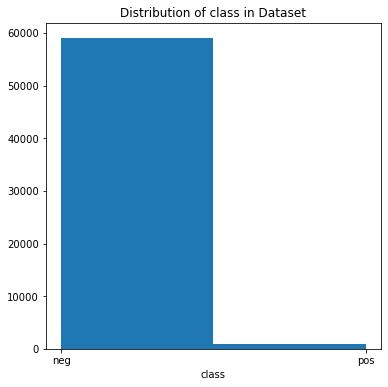

In [11]:
plt.figure(figsize=(6,6))
plt.hist(aps_df["class"], bins=2)
plt.title("Distribution of class in Dataset")
plt.xlabel("class")
plt.show()

In this graphic we can see how imbalance the 'class' data record is. 

# Data Cleaning

Before proceeding with the data cleaning, we will proceed to verify if there is duplicate data within our dataset. We can obtain this with the .duplicated() function and we will add the .sum() function to have the total count, in case of finding duplicate data.

In [12]:
aps_df.duplicated().sum()

0

The code returned a negative response. There is no duplicate data.

Now it's time to know how many missing values we have in our dataset. Running the isna().sum() method it's going to return the number of missing values in each column.

In [13]:
aps_df.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In this case, it seems that the Panda library it's not able to identify the missing values in the dataset, although we clearly have them on it. So, to sort this out it’s necessary to use the “na_values” parameter when we import the dataset csv file so Pandas can recognize the missing values that we have. 

In [14]:
missing_values = ['na']
aps_df = pd.read_csv ('aps_failure_set.csv', na_values = missing_values)

In [15]:
aps_df.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [16]:
aps_df.isna().sum().sum()

850015

Using the .isna() function together with the .sum() function we can obtain the sum of the missing values of each feature. And using the function .sum().sum() together we can obtain the total sum of the number of missing values that exist in the dataset.

The EDA analysis shows that this dataset has a total of  850.015 missing values. This amount represents 8% of data records. There are features that have a disproportionate amount of missing values compared to other features. For example, the feature "aa_000" has 46,329 missing values while the feature "ee_007" only has 671 missing values. So the next step will be to find out the percentage of missing values that each feature has. This action will provide us with information about the features that have a high percentage of missing values and don't provide valuable information to our EDA. The most practical way to see this information is by plotting a bar graph.

In [17]:
#2 references code
percentage_missing_data = aps_df.isna().sum() * 100 / len(aps_df)
missing_values = pd.DataFrame({'column_name': aps_df.columns,
                                 'percentage_missing': percentage_missing_data})

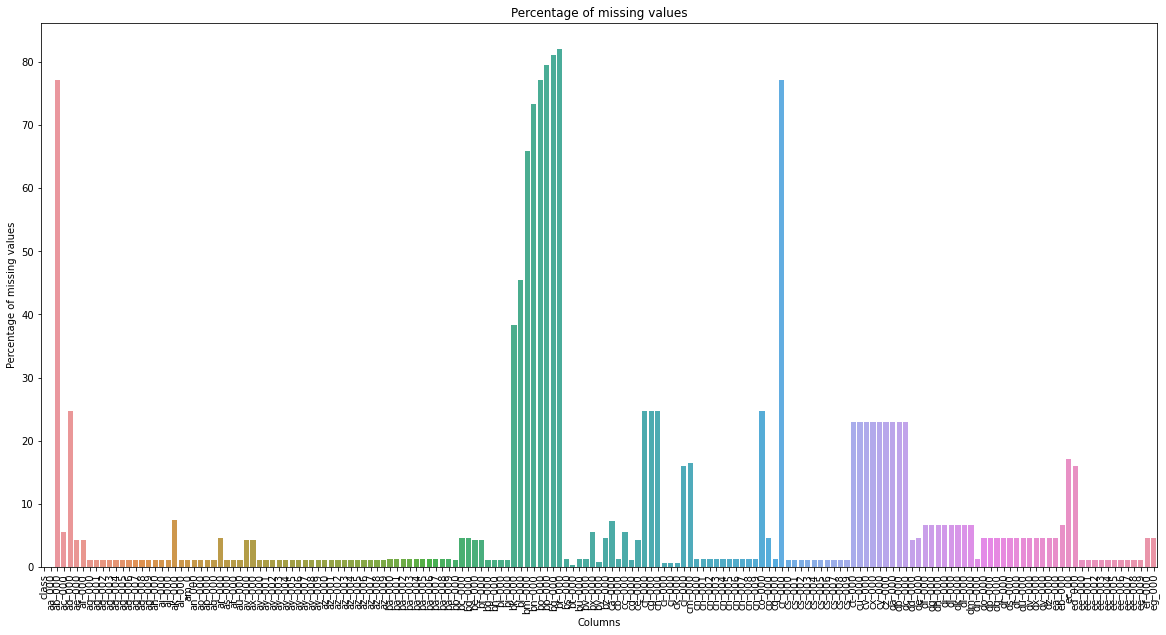

In [18]:
plt.figure(figsize=(20, 10))
sns.barplot(x =percentage_missing_data.index, y =percentage_missing_data)
plt.title('Percentage of missing values')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.ylabel('Percentage of missing values')
plt.show()

In this graph we can see that there are 8 features with more than 60% of missing values. According to the blog www.mastersindatascience.org in their article on “How to deal with missing data”, they recommend that "If data are missing for more than 60% of the observations, it may be convenient to discard them if the variable is insignificant"(3).

Therefore, the next features will be dropped.

In [19]:
aps_df.columns[aps_df.isnull().mean()>0.60]

Index(['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000',
       'cr_000'],
      dtype='object')

In [20]:
aps_v1 = aps_df.drop(aps_df.columns[aps_df.isnull().mean()>0.60], axis = 1)
aps_v1

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [21]:
aps_v1.isna().sum().sum()

481740

A new subset called "aps_v1" was created, where the columns with more than 60% missing values have been dropped. And the new subset has 163 columns with 481,740 missing values, this way we have eliminated almost 43% of the missing data.

In [22]:
for column_name in aps_v1.columns:
    column = aps_v1[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  class  is :  0
Count of zeros in column  aa_000  is :  393
Count of zeros in column  ac_000  is :  8752
Count of zeros in column  ad_000  is :  2009
Count of zeros in column  ae_000  is :  55543
Count of zeros in column  af_000  is :  55476
Count of zeros in column  ag_000  is :  59133
Count of zeros in column  ag_001  is :  58587
Count of zeros in column  ag_002  is :  56181
Count of zeros in column  ag_003  is :  46894
Count of zeros in column  ag_004  is :  1305
Count of zeros in column  ag_005  is :  1941
Count of zeros in column  ag_006  is :  1238
Count of zeros in column  ag_007  is :  15875
Count of zeros in column  ag_008  is :  25091
Count of zeros in column  ag_009  is :  40698
Count of zeros in column  ah_000  is :  133
Count of zeros in column  ai_000  is :  53588
Count of zeros in column  aj_000  is :  46919
Count of zeros in column  ak_000  is :  55227
Count of zeros in column  al_000  is :  37473
Count of zeros in column  am_0  is :  37295
Coun

Another curious fact about the dataset is that there are many columns with large percentages of zeros, so we proceeded  to count the amount of zeros in each feature. For example the feature "ag_000" has a total of 59,133 zeros in the column while columns like "ah_000" have only 133.

In [23]:
columns_with_zeros = aps_v1.columns[(aps_v1==0).mean()>0.80]
columns_with_zeros.shape

(33,)

In [24]:
aps_v2 = aps_v1.columns[(aps_v1==0).mean()>0.80]
aps_v2

Index(['ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ai_000', 'ak_000',
       'ar_000', 'as_000', 'at_000', 'au_000', 'ay_000', 'ay_001', 'ay_002',
       'ay_003', 'ay_004', 'ay_009', 'az_008', 'az_009', 'cn_000', 'cn_001',
       'cs_009', 'df_000', 'dg_000', 'dh_000', 'dj_000', 'dk_000', 'dl_000',
       'dm_000', 'dz_000', 'ea_000', 'ef_000', 'eg_000'],
      dtype='object')

We will proceed to drop the columns that have more than 80% of zeros in their information. In this case there are 33 columns.

In [25]:
aps_v2 = aps_v1.drop(aps_v1.columns[(aps_v1==0).mean()>0.80], axis = 1)
aps_v2 

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,neg,76698,2.130706e+09,280.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,...,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,...,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0
2,neg,41040,2.280000e+02,100.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,...,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0
3,neg,12,7.000000e+01,66.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,...,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0
4,neg,60874,1.368000e+03,458.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,...,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,186.0,2564.0,59100.0,1603216.0,6015982.0,1968266.0,164972.0,...,1608808.0,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0
59996,neg,2286,2.130707e+09,224.0,0.0,104.0,99186.0,36564.0,128.0,0.0,...,13934.0,15024.0,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,18.0,0.0,28.0,11592.0,11538.0,0.0,0.0,...,15876.0,2740.0,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0
59998,neg,80292,2.130706e+09,494.0,0.0,330.0,202498.0,3251010.0,2061456.0,360436.0,...,1180714.0,1709450.0,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0


In [26]:
aps_v2.isna().sum().sum()

418729

A new subset called "aps_v2" was created, eliminating a total of 33 columns, the new subset has 130 columns with a total of 418,729 missing values.

Now it’s time to use the .describe() function to analyze the standard deviation of the variables.

In [27]:
pd.options.display.max_columns = None
aps_v2.describe()

,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,aj_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,av_000,ax_000,ay_005,ay_006,ay_007,ay_008,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,di_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
count,6.000000e+04,5.666500e+04,4.513900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.935500e+04,5.937100e+04,5.935800e+04,5.937100e+04,5.935800e+04,5.941100e+04,5.935800e+04,5.941100e+04,57500.000000,57499.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.935500e+04,57275.000000,57273.000000,57497.000000,57500.000000,5.935800e+04,5.935800e+04,5.941100e+04,5.941100e+04,3.696600e+04,3.272300e+04,5.927400e+04,5.983300e+04,5.930900e+04,5.930900e+04,5.674300e+04,5.952700e+04,5.727700e+04,55644.000000,5.927400e+04,5.674500e+04,59324.0,5.749800e+04,4.513900e+04,45139.000000,45139.000000,5.966200e+04,5.966200e+04,5.966200e+04,50447.000000,50123.000000,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,4.513900e+04,57276.000000,5.930900e+04,59331.000000,59331.000000,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,46192.000000,46192.000000,4.619200e+04,4.619200e+04,46192.000000,4.619200e+04,46192.000000,46192.000000,4.619200e+04,57497.000000,57276.000000,5.599400e+04,5.930900e+04,5.727600e+04,57274.000000,5.727400e+04,5.727400e+04,5.727300e+04,57273.000000,5.727400e+04,5.727400e+04,5.727700e+04,5.727600e+04,5.599300e+04,49761.000000,50447.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04
mean,5.933650e+04,3.560143e+08,1.906206e+05,8.859128e+04,4.370966e+05,1.108374e+06,1.657818e+06,4.993098e+05,3.556989e+04,5.114753e+03,1.809931e+06,1.143675e+03,5.913048e+04,9.328133e+04,3.461037e+06,3.002440e+06,1.004160e+06,4.424045e+05,1117.825913,374.327380,1.119791e+05,1.078551e+06,1.546032e+06,1.051123e+06,7.849608e+03,4.420992e+03,8.066082e+03,8.724082e+04,1.476897e+06,2.135584e+06,1.018943e+05,1.737782e+04,1.399652e+06,8.941175e+05,4.130969e+05,2.740070e+05,2.048756e+05,1.889412e+05,2.106288e+05,1.857874e+05,3.588284e+04,3.576672e+04,4.526177e+06,569.526565,921.775461,1372.646086,74.878261,1.809431e+06,5.794308e+04,4.922076e+05,5.100892e+05,2.804291e+05,3.213537e+05,8.036055e+04,5.941650e+04,4.515325e+06,4.515325e+06,4.112218e+06,2.202893e+04,1.019608e+05,39168.817123,4.056381e+05,3.803444e+06,1209600.0,6.434356e+04,1.902218e+05,91.520415,0.000443,3.481204e+06,1.028419e+05,7.143427e+05,343.018812,343.102847,1.610509e+05,5.314780e+05,1.282835e+06,1.341059e+06,4.105641e+05,6.442513e+04,1.922679e+04,7.820467e+03,1.905156e+05,570.404288,4.515325e+06,5479.857073,788.425545,2.388106e+05,3.553731e+05,4.442283e+05,2.235387e+06,5.457742e+05,1.477142e+04,2.117473e+02,749.091271,1222.960989,1.928825e+06,3.515102e+05,274.179338,1.937429e+04,7.393791,13.416652,2.200752e+06,3123.961911,375.147112,3.724824e+04,3.374545e+04,2.850785e+04,6958.652722,4.529375e+06,2.037598e+05,8.965500e+04,15403.354670,4.0587

In [28]:
aps_v2["cd_000"].std()

0.0

It can be seen that the feature "cd_000" has a zero std. So I'm going to proceed to drop the "cd_000" column, because by having a zero std, this variable does not provide valuable information to our EDA either, because all the values of the column are identical.

In [29]:
aps_v3 = aps_v2.drop(labels=['cd_000'], axis=1)
aps_v3

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,aj_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,av_000,ax_000,ay_005,ay_006,ay_007,ay_008,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,di_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,neg,76698,2.130706e+09,280.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,1012.0,268.0,469014.0,4239660.0,703300.0,755876.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,246244.0,2.0,96.0,0.0,5245752.00,0.00,916567.68,6.0,1924.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,68.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,0.0,NaN,NaN,NaN,2291079.36,0.00,643536.96,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0
2,neg,41040,2.280000e+02,100.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,358.0,110.0,0.0,870456.0,239798.0,1450312.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130640.0,28000.0,41040.08,2673338.0,2673338.0,2678534.0,15439.0,7466.0,22436.0,248240.0,2560566.0,63328.0,0.0,124.0,0.0,2322692.16,0.00,236099.52,0.0,0.0,0.0,33276.0,1215280.0,1102798.0,196502.0,10260.0,2422.0,28.0,0.0,6.0,2673338.0,3584.0,500.0,56362.0,149726.0,100326.0,1744838.0,488302.0,16682.0,246.0,230.0,292.0,2180528.0,29188.0,22.0,20346.0,0.0,0.0,2341048.0,1494.0,152.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0
3,neg,12,7.000000e+01,66.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,60.0,6.0,0.0,0.0,2038.0,5596.0,64.0,6.0,6.0,914.0,76.0,2478

In [30]:
aps_v3.isna().sum().sum()

418053

I proceeded to create a new subset called "aps_v3", this subset contains all the features that are relevant to our PCA. Now our clean dataset proceeds to have 129 columns and a total of 418,053 missing values.

# Scaling Data

Scaling it’s a important part of Data Preparation before applying Machine Learning models, this way we ensure that all the features in our data have the same scale, so one feature doesn't dominate over other features. When we run the .describe() function in the” aps_v2” subset we can see how the features have different maximum and minimum values. By scaling we achieve that all the features have a value between 0 and 1.


To achieve this, different techniques are applied. But first we are going to import the library that will allow us to perform it. Scikit-learn is an open source library containing tools for "machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction".(6)

In [31]:
import sklearn.preprocessing as preproc

In [32]:
from sklearn.preprocessing import MinMaxScaler

Scaling can only be performed on numeric features, so the "class" column will have to be separated from the rest of the features.

In [33]:
X = aps_v3.drop("class", axis = 1)
y = aps_v3["class"]

In [34]:
aps_scaling = preproc.MinMaxScaler()
X = aps_scaling.fit_transform(X)
aps_scaled = pd.DataFrame(X)
aps_scaled.values

array([[2.79250729e-02, 9.99999832e-01, 3.26176944e-08, ...,
        1.32092204e-03, 3.80040977e-03, 0.00000000e+00],
       [1.20361295e-02, 0.00000000e+00,            nan, ...,
        6.78540949e-04, 5.06430656e-03, 3.93692728e-04],
       [1.49423061e-02, 1.07006746e-07, 1.16491766e-08, ...,
        1.32147397e-03, 4.93725255e-03, 1.34905375e-04],
       ...,
       [4.07782233e-05, 9.99999829e-01, 2.09685178e-09, ...,
        2.19267238e-05, 0.00000000e+00, 0.00000000e+00],
       [2.92336170e-02, 9.99999829e-01, 5.75469322e-08, ...,
        1.38041354e-03, 4.16392542e-02, 1.01945944e-01],
       [1.46444794e-02, 3.27590826e-07, 7.31568288e-08, ...,
        1.32383222e-03, 8.84312545e-03, 4.14689673e-05]])

Once the normalization of our data is done, we will proceed to check for outliers of our scaled data.

<AxesSubplot:>

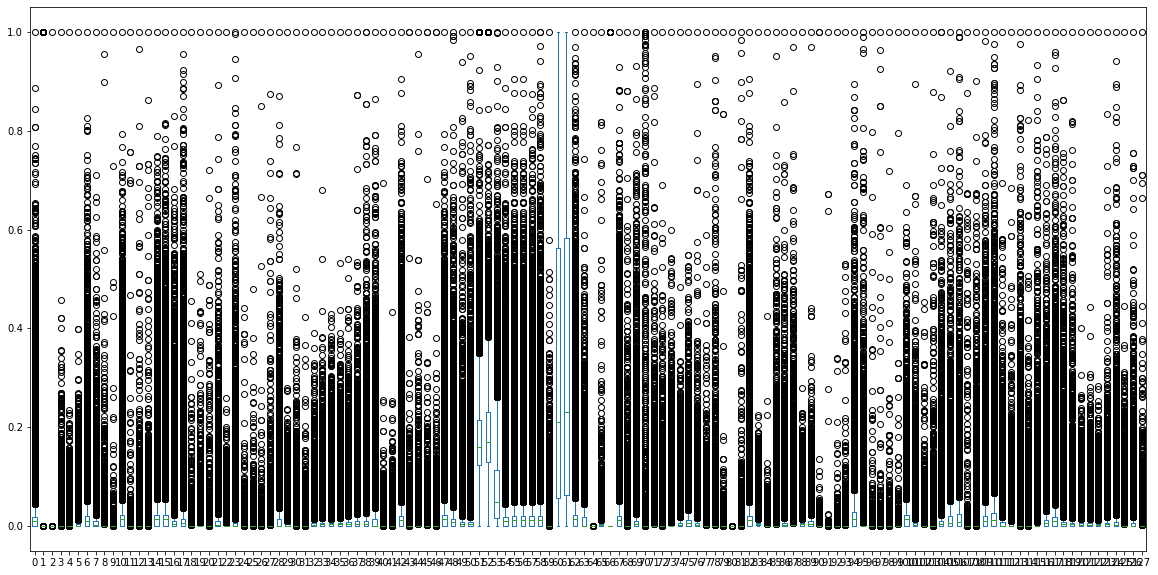

In [35]:
aps_scaled.plot.box(figsize=(20, 10))

By plotting a graph of the scaled data we can observe that many of the features have a big amount of outliers.

We will proceed to calculate the upper and lower limit, so in this way we can visualize the outliers in the scaled dataset.

In [36]:
lower_outliers = aps_scaled.mean() - 1.5 * aps_scaled.std()
lower_outliers

0     -0.057821
1     -0.392498
2     -0.007038
3     -0.016624
4     -0.013653
         ...   
123   -0.022419
124   -0.040201
125   -0.018781
126   -0.027795
127   -0.016487
Length: 128, dtype: float64

In [37]:
upper_outliers = aps_scaled.mean() + 1.5 * aps_scaled.std()
upper_outliers

0      0.101029
1      0.726673
2      0.007082
3      0.019419
4      0.017474
         ...   
123    0.036137
124    0.061276
125    0.024572
126    0.042195
127    0.020891
Length: 128, dtype: float64

And now with this information, we will display the outliers in the dataset and the non_outliers will be displayed as temporary missing values.

In [38]:
display(aps_scaled[~((aps_scaled < upper_outliers) & (aps_scaled > lower_outliers))])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23898,NaN,NaN,NaN,NaN,NaN,NaN,0.894540,0.953949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0605

All data records cataloged as outliers will be replaced as missing values in the scaled dataset.

In [39]:
aps_scaled[aps_scaled < lower_outliers] = np.nan
aps_scaled[aps_scaled > upper_outliers] = np.nan

In [40]:
aps_scaled.isna().sum().sum()

623771

By replacing outliers as missing values to make our dataset more evenly distributed, our missing values increase in number again to 623,771.

# Imputation

"Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset". (Singhal, S., 2021)
Since we still have a large number of missing values, it is necessary to perform an imputation, and replace all the missing values with a concrete value (mean, median, etc). In this particular case, the median will be used to reemplace them. 

In [41]:
column_medians = aps_scaled.median()
aps_fillna = aps_scaled.fillna(column_medians)
display(aps_fillna)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.027925,3.473026e-08,3.261769e-08,0.000000,1.627842e-04,0.007996,0.038972,0.015907,0.001463,0.000000,0.034368,0.000000,0.000000,0.000000,0.035022,0.029911,0.022660,0.044285,0.001274,0.002297,0.003754,0.033205,0.001436,0.007229,0.000531,0.000465,2.893584e-04,2.708831e-04,5.000101e-03,0.011813,3.681733e-05,1.021497e-07,0.010000,0.008791,0.007444,0.007777,0.012332,0.035479,0.058892,0.000250,0.000000e+00,0.000000e+00,0.034739,0.000000,0.000033,0.000133,0.000979,0.034368,0.030469,0.021086,0.017480,0.252354,0.269627,0.172130,0.027925,0.034739,0.034739,0.035415,0.043479,0.001693,0.446972,0.527780,0.041502,0.050171,2.329835e-10,0.004486,0.0,0.037208,0.000000,0.016536,0.000046,0.026223,0.000000e+00,1.244439e-03,0.007709,0.027562,0.019164,2.981619e-03,0.001486,4.417780e-05,2.562819e-08,0.000484,0.034739,0.012483,0.002794,5.815179e-03,0.012301,0.005728,0.010592,0.012140,2.043585e-03,0.000074,0.000584,0.001000,0.050517,0.001163,0.000000,1.023150e-05,0.0,0.001868,0.044143,0.010630,0.006391,0.000000,0.021296,0.045829,0.004453,0.000000e+00,0.000000,0.040779,0.057779,0.032041,0.014773,0.000000,0.000000,0.002118,0.023069,0.032751,0.012881,0.017378,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000
1,0.012036,0.000000e+00,1.467796e-08,0.000000,7.977081e-05,0.003646,0.018302,0.008157,0.001787,0.000000,0.018766,0.000012,0.000000,0.000000,0.018180,0.017407,0.013917,0.013244,0.000000,0.000000,0.000572,0.006052,0.004078,0.000952,0.000725,0.001724,9.689357e-04,2.870729e-04,8.208840e-03,0.004005,2.279950e-04,1.532245e-07,0.005920,0.003845,0.003575,0.004178,0.005457,0.007219,0.008733,0.016044,2.785199e-03,1.077188e-04,0.018907,0.000217,0.001481,0.000449,0.006856,0.018766,0.015318,0.015317,0.008575,0.260487,0.274495,0.006459,0.012036,0.018907,0.018907,0.019221,0.017698,0.006416,0.151162,0.005705,0.019802,0.000000,2.329835e-10,0.002056,0.0,0.016250,0.000000,0.011610,0.000000,0.000000,6.494771e-07,1.038584e-03,0.006944,0.010922,0.004667,1.095049e-03,0.000688,1.538530e-06,9.319341e-10,0.000000,0.018907,0.007340,0.001814,3.577230e-03,0.008252,0.003646,0.004847,0.004085,7.100159e-04,0.000014,0.000226,0.000368,0.011113,0.000940,0.000000,1.023150e-05,0.0,0.000000,0.013004,0.007440,0.002963,0.000000,0.011535,0.019709,0.017052,0.000000e+00,0.000000,0.020787,0.024761,0.009800,0.006837,0.000000,0.000000,0.002630,0.020862,0.028186,0.008862,0.008391,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394
2,0.014942,1.070067e-07,1.164918e-08,0.000000,7.201835e-06,0.002068,0.020031,0.004624,0.000679,0.000000,0.016622,0.000000,0.000000,0.000000,0.016839,0.017787,0.003860,0.006013,0.000451,0.000943,0.000000,0.006817,0.000490,0.013870,0.000160,0.000255,8.637144e-05,7.513561e-04,1.472287e-02,0.001519,5.264043e-07,0.000000e+00,0.003395,0.005779,0.005955,0.006902,0.007536,0.007068,0.005451,0.005705,1.471247e-06,0.000000e+00,0.013861,0.000322,0.000659,0.000711,0.000078,0.016622,0.009000,0.003564,0.003055,0.104646,0.099672,0.026995,0.014942,0.013861,0.013861,0.014372,0.015408,0.000184,0.185489,0.205238,0.017230,0.012903,0.000000e+00,0.005794,0.0,0.016475,0.000000,0.004260,0.000000,0.000000,0.000000e+00,3.503499e-04,0.007154,0.009360,0.002726,3.095608e-04,0.000321,7.692651e-07,0.000000e+00,0.000012,0.013861,0.004271,0.001139,1.222976e-03,0.003529,0.001340,0.004602,0.006622,1.294762e-03,0.000155,0.000253,0.000398,0.026719,0.000662,0.000024,1.062092e-03,0.0,0.000000,0.019386,0.003356,0.000863,0.000000,0.004745,0.020369,0.023377,0.000000e+00,0.000000,0.013231,0.016047,0.000652,0.000378,0.000000,0.000000,0.000787,0.009608,

In [42]:
aps_fillna.isna().sum().sum()

0

We double check the number of missing values ​​in our dataset, and after imputation, that value is zero.

# PCA 

"Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set" (Jaadi, Z. 2019).

The PCA is a tool that allows us to reduce the dimensionality of a very large dataset, into a smaller one that still contains all the necessary information. Smaller datasets are easier to explore, analyze and it is easier to apply Machine Learning algorithms. In this case the "aps_failure_set" contains 60,000 with 171 variables which makes it a very large dataset and despite the fact that columns that did not provide enough information were dropped, with its 128 columns it is still considered a very large dataset. To perform the PCA we will import the necessary tools.

In [43]:
from sklearn.decomposition import PCA

One of the requirements of the assignment was that 99.5% variance in the data be retained.

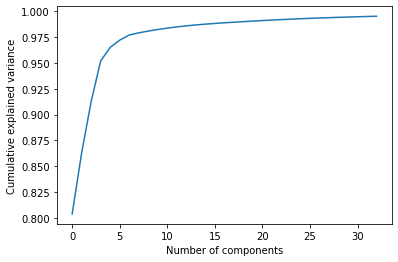

In [44]:
aps_pca = PCA(0.995)
aps_pca.fit(aps_fillna) 
plt.plot(np.cumsum(aps_pca.explained_variance_ratio_)) 
plt.xlabel("Number of components") 
plt.ylabel("Cumulative explained variance"); 

In [45]:
aps_projected = aps_pca.fit_transform(aps_fillna)
aps_projected.shape

(60000, 33)

The new dataset is projected and now from having 128 features it is reduced to only 33 features in it. This dataset needs to add the class column that was removed to be able to perform the scaling. So there will be 34 columns in total. 

In [46]:
aps_final = pd.DataFrame(aps_projected, columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26", "C27", "C28", "C29", "C30", "C31", "C32", "C33"])
display(aps_final)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33
0,0.381979,-0.089065,0.137222,0.010636,0.057561,-0.017504,-0.038219,0.010336,-0.016769,-0.001570,-0.001987,-0.019165,0.000125,0.015123,-0.001022,-0.016173,-0.045202,0.001104,-0.023055,-0.016253,0.009862,-0.003145,-0.010757,-0.025685,0.013129,-0.020027,0.019134,0.005528,0.003764,0.014825,-0.004745,-0.002267,-5.284136e-03
1,-0.224381,0.050540,0.180622,-0.032382,-0.033070,0.001569,-0.012472,-0.009841,-0.004845,-0.014336,-0.002987,-0.000078,-0.003819,-0.004992,0.002582,-0.010411,-0.000318,0.000972,-0.000730,-0.007895,0.001137,0.010119,0.003070,0.008319,0.002944,0.003650,-0.004795,0.004142,0.003967,0.001238,-0.001739,-0.001317,-8.990445e-04
2,-0.061179,0.022145,-0.065698,0.061365,-0.020714,0.005998,-0.014416,-0.000583,0.002977,0.007213,0.000813,0.000120,-0.003485,0.006284,-0.001182,0.000866,0.010262,0.003534,-0.000705,-0.000899,-0.005230,0.000102,0.005102,-0.003517,0.003988,0.003202,-0.000614,-0.003007,-0.002240,-0.000729,-0.000335,-0.000209,6.884931e-04
3,-0.320269,0.012588,-0.019175,-0.030474,-0.010025,0.000946,0.006226,-0.001736,0.000681,-0.001798,-0.000249,-0.000789,0.000507,-0.000536,0.000104,0.000899,-0.000225,-0.000317,-0.000569,0.000663,-0.000526,-0.000868,-0.000104,-0.001147,0.000337,-0.000542,0.000008,-0.000416,0.000081,0.000089,0.000110,0.000044,8.356067e-07
4,0.427941,-0.024409,0.075708,-0.017922,0.075502,0.007736,-0.031692,0.003832,0.018589,-0.004074,0.006644,0.000507,0.014723,-0.014946,0.012391,0.008005,-0.005684,0.017051,-0.002117,-0.006123,0.009337,0.000655,-0.003574,-0.009582,-0.008428,0.001595,-0.001324,-0.005678,-0.004429,-0.010580,-0.001455,0.001372,-1.087382e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.083309,-0.062678,0.131945,0.183864,-0.027622,0.023541,-0.017763,-0.004884,0.009560,-0.039658,-0.021059,0.001536,0.007689,0.020289,-0.019659,-0.023454,0.029007,0.000174,-0.017099,0.014923,0.011679,-0.047759,0.016405,-0.020841,-0.026937,-0.003668,0.002889,-0.021742,-0.003557,-0.000043,-0.012073,-0.001799,-5.853137e-03
59996,-0.173308,0.021083,-0.025893,-0.039264,-0.011897,0.001523,0.007673,-0.001326,0.001557,-0.001582,-0.000341,0.000138,0.000198,0.000003,-0.000339,0.000826,-0.001106,-0.000338,-0.000045,0.000760,-0.001031,-0.000483,-0.000059,-0.000802,-0.000479,-0.000871,0.000098,-0.000740,-0.000484,0.000073,0.000033,0.000633,-6.504964e-04
59997,-0.295141,0.014007,-0.020322,-0.032066,-0.009751,0.001021,0.006700,-0.001404,0.000364,-0.001909,-0.000443,-0.000560,0.000383,-0.000533,0.000232,0.000345,-0.000060,-0.000232,-0.000561,0.000488,-0.000322,-0.000872,0.000002,-0.001148,0.000271,-0.000508,-0.000035,-0.000389,0.000167,0.000181,0.000181,0.000040,-3.618346e-05
59998,-0.240078,-0.097192,0.146312,0.063674,-0.032609,-0.015500,-0.054707,-0.011614,-0.006567,-0.018710,0.016641,-0.012230,0.001739,0.014236,0.013482,0.001530,-0.012033,-0.000900,0.009257,0.011668,0.029749,-0.034406,-0.014444,-0.019798,-0.025276,-0.002863,0.000837,0.007204,0.001814,-0.009725,-0.001470,0.002803,-3.216784e-03


Here we proceeded to the renaming of all the features

In [47]:
aps_final["class"] = aps_df["class"]
display(aps_final)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,class
0,0.381979,-0.089065,0.137222,0.010636,0.057561,-0.017504,-0.038219,0.010336,-0.016769,-0.001570,-0.001987,-0.019165,0.000125,0.015123,-0.001022,-0.016173,-0.045202,0.001104,-0.023055,-0.016253,0.009862,-0.003145,-0.010757,-0.025685,0.013129,-0.020027,0.019134,0.005528,0.003764,0.014825,-0.004745,-0.002267,-5.284136e-03,neg
1,-0.224381,0.050540,0.180622,-0.032382,-0.033070,0.001569,-0.012472,-0.009841,-0.004845,-0.014336,-0.002987,-0.000078,-0.003819,-0.004992,0.002582,-0.010411,-0.000318,0.000972,-0.000730,-0.007895,0.001137,0.010119,0.003070,0.008319,0.002944,0.003650,-0.004795,0.004142,0.003967,0.001238,-0.001739,-0.001317,-8.990445e-04,neg
2,-0.061179,0.022145,-0.065698,0.061365,-0.020714,0.005998,-0.014416,-0.000583,0.002977,0.007213,0.000813,0.000120,-0.003485,0.006284,-0.001182,0.000866,0.010262,0.003534,-0.000705,-0.000899,-0.005230,0.000102,0.005102,-0.003517,0.003988,0.003202,-0.000614,-0.003007,-0.002240,-0.000729,-0.000335,-0.000209,6.884931e-04,neg
3,-0.320269,0.012588,-0.019175,-0.030474,-0.010025,0.000946,0.006226,-0.001736,0.000681,-0.001798,-0.000249,-0.000789,0.000507,-0.000536,0.000104,0.000899,-0.000225,-0.000317,-0.000569,0.000663,-0.000526,-0.000868,-0.000104,-0.001147,0.000337,-0.000542,0.000008,-0.000416,0.000081,0.000089,0.000110,0.000044,8.356067e-07,neg
4,0.427941,-0.024409,0.075708,-0.017922,0.075502,0.007736,-0.031692,0.003832,0.018589,-0.004074,0.006644,0.000507,0.014723,-0.014946,0.012391,0.008005,-0.005684,0.017051,-0.002117,-0.006123,0.009337,0.000655,-0.003574,-0.009582,-0.008428,0.001595,-0.001324,-0.005678,-0.004429,-0.010580,-0.001455,0.001372,-1.087382e-03,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.083309,-0.062678,0.131945,0.183864,-0.027622,0.023541,-0.017763,-0.004884,0.009560,-0.039658,-0.021059,0.001536,0.007689,0.020289,-0.019659,-0.023454,0.029007,0.000174,-0.017099,0.014923,0.011679,-0.047759,0.016405,-0.020841,-0.026937,-0.003668,0.002889,-0.021742,-0.003557,-0.000043,-0.012073,-0.001799,-5.853137e-03,neg
59996,-0.173308,0.021083,-0.025893,-0.039264,-0.011897,0.001523,0.007673,-0.001326,0.001557,-0.001582,-0.000341,0.000138,0.000198,0.000003,-0.000339,0.000826,-0.001106,-0.000338,-0.000045,0.000760,-0.001031,-0.000483,-0.000059,-0.000802,-0.000479,-0.000871,0.000098,-0.000740,-0.000484,0.000073,0.000033,0.000633,-6.504964e-04,neg
59997,-0.295141,0.014007,-0.020322,-0.032066,-0.009751,0.001021,0.006700,-0.001404,0.000364,-0.001909,-0.000443,-0.000560,0.000383,-0.000533,0.000232,0.000345,-0.000060,-0.000232,-0.000561,0.000488,-0.000322,-0.000872,0.000002,-0.001148,0.000271,-0.000508,-0.000035,-0.000389,0.000167,0.000181,0.000181,0.000040,-3.618346e-05,neg
59998,-0.240078,-0.097192,0.146312,0.063674,-0.032609,-0.015500,-0.054707,-0.011614,-0.006567,-0.018710,0.016641,-0.012230,0.001739,0.014236,0.013482,0.001530,-0.012033,-0.000900,0.009257,0.011668,0.029749,-0.034406,-0.014444,-0.019798,-0.025276,-0.002863,0.000837,0.007204,0.001814,-0.009725,-0.001470,0.002803,-3.216784e-03,neg


And I proceeded to include the class column in the final dataset.

# Curse of Dimensionality

We are currently at a time where large amounts of information are produced per second, in real time. This represents a problem when the time comes for this information to be analyzed, because it becomes very heavy and complex for the tools to analyze.

Already by the year 1957, a mathematician named R. Bellman in his book "Dynamic Programming", talked about these complications and introduced the term "curse of dimensionality". In his book he talked about the problems that are faced when handling, processing and analyzing high dimensional data where the number of features or atrributes used to describe the data is large. 

Working with high dimensional datasets not only brings complexities of tools and infrastructure to analyze, clean, etc but it also brings security and privacy issues, problems that companies don't want to face.

One of the classic techniques to solve the high dimensionality problem is PCA. "The Principle Component Analysis(PCA) an unsupervised learning algorithm used mostly as a data preprocessing step before applying it into any model" (Mohanty, A., 2018).

# Conclusions

Detecting problems caused by the APS early can help save the company a lot of money and the fact that this can be prevented just by analyzing the data collected is one of the benefits of Data Analytics for Business.

Carrying out the exploration, analysis, and cleaning of this dataset with all its methods was definitely a challenge. Despite having all the knowledge that is taught during classes, many things have had to be research. Without a doubt, the preparation of a dataset for the application of machine learning models has been a challenge, especially since it is the first time that I have worked with a high dimensional dataset. Despite using the necessary tools to reduce the dimensionality of the dataset, we were still left with 34 features, which is still considered a very large dataset. 

The results of the EDA and later the application of ML models, can bring economic and financial benefits to the company and at the same time personalize the experience of customers and users. And in this case they can reduce the incidence of trucks with APS-related problems.

Definitely a data analyst faces many prerogatives and doubts when working with data. The decisions that are made must always be rational and for the benefit of the client and companies.

## Reference: 
1. Yıldırım, S. (2020). Handling Missing Values with Pandas. [online] Medium. Available at: https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f. [Accessed 05 Nov. 2022].
2. Stack Overflow. (n.d.). python - Find out the percentage of missing values in each column in the given dataset. [online] Available at: https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset. [Accessed 08 Nov. 2022].
3. Master’s in Data Science. (n.d.). How to Deal with Missing Data. [online] Available at: https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/. [Accessed 08 Nov. 2022].
4. Karanam, S. (2021). Curse of Dimensionality — A ‘Curse’ to Machine Learning. [online] Medium. Available at: https://towardsdatascience.com/curse-of-dimensionality-a-curse-to-machine-learning-c122ee33bfeb#:~:text=Curse%20of%20Dimensionality%20describes%20the. [Accessed 13 Nov. 2022].
5. Varun (n.d.). Count number of Zeros in Pandas Dataframe Column – thisPointer. [online] Available at: https://thispointer.com/count-number-of-zeros-in-pandas-dataframe-column/. [Accessed 10 Nov. 2022].
6. Analytics Vidhya (2015). Scikit-Learn In Python - Important Machine Learning Tool. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2015/01/scikit-learn-python-machine-learning-tool/. [Accessed 13 Nov. 2022].
7. Singhal, S. (2021). Imputation Techniques | What are the types of Imputation Techniques. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/#:~:text=What%20is%20Imputation%3F [Accessed 13 Nov. 2022].
8. Jaadi, Z. (2019). A Step by Step Explanation of Principal Component Analysis. [online] Built In. Available at: https://builtin.com/data-science/step-step-explanation-principal-component-analysis. [Accessed 13 Nov. 2022].
9. Mohanty, A. (2018). Curse Of Dimensionality and PCA. [online] Medium. Available at: https://adityaroc.medium.com/curse-of-dimensionality-and-pca-f90f1258a7f2#:~:text=The%20Curse%20Of%20Dimensionality%3A [Accessed 13 Nov. 2022].